# $X_{wt}$ input

**Goal:** Is the training just as good as ... (?)

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

import os
os.sys.path += ['../gp-for-flows/','../PyATLASstyle/','../../hh4b/hh4b-plots/'] 

from bkgPred import *

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

In [2]:
nSeeds = 25

In [3]:
c = 'val1' 
c1 = 'val1p1' 
c2 = 'val1p2' 


fc = f'../gp-for-flows/configs/{c}.json'
with open(fc,'r') as cfile:
    hps = json.load(cfile)

L,H,nb,K,lr,beta,p = hps['L'],hps['H'],hps['nb'],hps['K'],hps['lr'],hps['beta'],hps['p']

modelDir = f'../gp-for-flows/models/'

colTag = '_'.join(hps['cols'])
colTag1 = '_'.join(['log_pT_h1', 'log_pT_h2', 'eta_h1', 'eta_h2','X_wt_tag', 'log_dphi_hh'])
colTag2 = '_'.join(['log_pT_h1', 'log_pT_h2', 'eta_h1', 'eta_h2', 'log_dphi_hh','X_wt_tag'])

modelConfig  = f'nsf_rq-coupling_{colTag }_lu_{L}_layers_H_{H}_{nb}_blocks_K_{K}_B_3_lr_{lr}_{beta}_p{p}_iter0'
modelConfig1 = f'nsf_rq-coupling_{colTag1}_lu_{L}_layers_H_{H}_{nb}_blocks_K_{K}_B_3_lr_{lr}_{beta}_p{p}_iter0'
modelConfig2 = f'nsf_rq-coupling_{colTag2}_lu_{L}_layers_H_{H}_{nb}_blocks_K_{K}_B_3_lr_{lr}_{beta}_p{p}_iter0'

In [14]:
yr=17

x,y = 124,117
eps = 0.05
r_CR = 45

subDir = f'data{yr}-MAY21_2b_0of100_detaCut_ggf'

In [15]:
figDir = f'figures/{subDir}'
if not os.path.exists(figDir):
    os.mkdir(figDir)

In [16]:
hdict0 = {} # val1
hdict1 = {} # val1p1
hdict2 = {} # val1p2

with open(f'{modelDir}/{subDir}/{modelConfig}/hists_gp_100k_25bins.json','r') as hfile:
    out0 = json.load(hfile)

with open(f'{modelDir}/{subDir}/{modelConfig1}/hists_gp_100k_25bins.json','r') as hfile:
    out1 = json.load(hfile)

with open(f'{modelDir}/{subDir}/{modelConfig2}/hists_gp_100k_25bins.json','r') as hfile:
    out2 = json.load(hfile)
    
for k in out0.keys(): 
    hdict0[k] = np.array( out0[k])

for k in out1.keys(): 
    hdict1[k] = np.array( out1[k])
    
for k in out2.keys(): 
    hdict2[k] = np.array( out2[k])

In [17]:
cols = ['m_h1','m_h2','ntag','kinematic_region','pass_vbf_sel','dEta_hh','X_hh','X_wt_tag',
        'event_number','m_hh','pT_h1','pT_h2','eta_h1','eta_h2','phi_h1','phi_h2']

with uproot.open(f'../data/RR/cryptotuples/data{yr}.root') as f:
    arr = f['fullmassplane'].arrays(cols)

mask = getMask(
                arr,
                x,
                y,
                eps,
                r_CR,
                detaCut=0,
                vbfCut=2,
                ntag=2,
                nSplits=100,
                replica=0,
              )

df = ak.to_pandas(arr[mask])

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


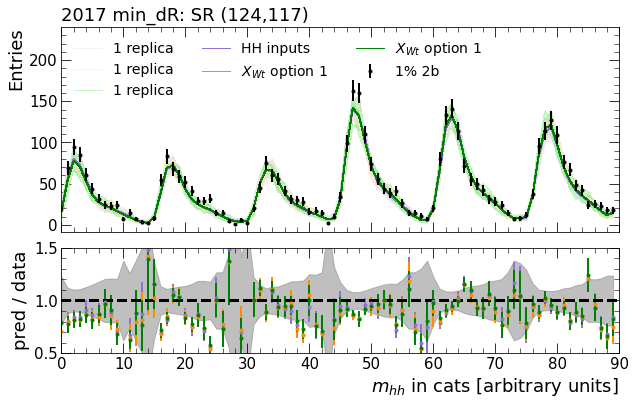

In [18]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,6),nrows=2,sharex=True,
                              gridspec_kw={"height_ratios": [.66,.34],
                                           "hspace":.1})

for i in range(nSeeds):
    

    for hdict, color in zip([hdict0,hdict1,hdict2],['lavender','bisque','lightgreen']):
    
        hi = hdict[f'X_hh_dEta_hh_m_hh_SR_{i}']
        ax1.plot(hi,color=color,lw=1,alpha=.5,
                 label='1 replica' if i == 0 else None)
        #break
        
ax1.plot(hdict0[f'X_hh_dEta_hh_m_hh_SR_mean'],color='mediumpurple',label='HH inputs',lw=1)           
ax1.plot(hdict2[f'X_hh_dEta_hh_m_hh_SR_mean'],color='darkorange',label='$X_{Wt}$ option 1',lw=1)   
ax1.plot(hdict2[f'X_hh_dEta_hh_m_hh_SR_mean'],color='g',label='$X_{Wt}$ option 1',lw=1)   

h_2b = np.histogramdd(df[d_cols].values,bins=edg_3d)[0].flatten()
ax1.errorbar(range(len(h_2b)),h_2b,np.sqrt(h_2b),color='k',lw=0, 
             elinewidth=2,marker='.',label='1% 2b',zorder=5)


ax2.errorbar(range(len(h_2b)),
             hdict0[f'X_hh_dEta_hh_m_hh_SR_mean']/h_2b,
             hdict0[f'X_hh_dEta_hh_m_hh_SR_std']/h_2b,
             color='mediumpurple',label='mean, ggf',marker='.',lw=0,elinewidth=2)           
ax2.errorbar(range(len(h_2b)),
             hdict1[f'X_hh_dEta_hh_m_hh_SR_mean']/h_2b,
             hdict1[f'X_hh_dEta_hh_m_hh_SR_std']/h_2b,
             color='darkorange',label='mean, ggf',marker='.',lw=0,elinewidth=2)   
ax2.errorbar(range(len(h_2b)),
             hdict2[f'X_hh_dEta_hh_m_hh_SR_mean']/h_2b,
             hdict2[f'X_hh_dEta_hh_m_hh_SR_std']/h_2b,
             color='g',label='mean, ggf',marker='.',lw=0,elinewidth=2)   

ax2.fill_between(range(len(h_2b)),1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)

ax2.plot([0,90],[1]*2,'k--')

ax2.set_xlabel('$m_{hh}$ in cats [arbitrary units]',x=1,ha='right',fontsize=18)
ax2.set_ylabel('pred / data',fontsize=18)

ax1.set_ylabel('Entries',y=1,ha='right',fontsize=18)
ax1.set_title(f'20{yr} min_dR: SR ({x},{y})',x=0,loc='left')

ax1.legend(ncol=3,loc='upper left')
ax1.set_xlim(0,90)
ymin,ymax=ax1.get_ylim()
ax1.set_ylim(ymin,1.3*ymax)

ax2.set_ylim([0.5,1.5])

plt.savefig(f'{figDir}/m_hh_cats_{nSeeds}seeds_preXwt.pdf',bbox_inches='tight')
plt.show()

And now with the $X_{Wt}$ cut!!

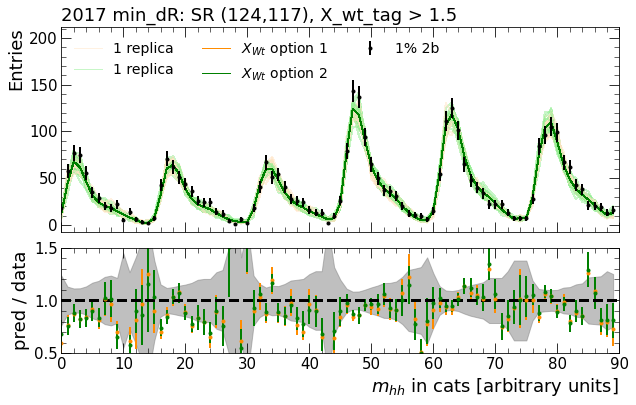

In [19]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,6),nrows=2,sharex=True,
                              gridspec_kw={"height_ratios": [.66,.34],
                                           "hspace":.1})

for i in range(nSeeds):
    

    for hdict, color in zip([hdict1,hdict2],['bisque','lightgreen']):
    
        hi = hdict[f'X_hh_dEta_hh_m_hh_SR_Xwt_cut_{i}']
        ax1.plot(hi,color=color,lw=1,alpha=.5,
                 label='1 replica' if i == 0 else None)
        
        
ax1.plot(hdict2[f'X_hh_dEta_hh_m_hh_SR_Xwt_cut_mean'],color='darkorange',label='$X_{Wt}$ option 1',lw=1)   
ax1.plot(hdict2[f'X_hh_dEta_hh_m_hh_SR_Xwt_cut_mean'],color='g',label='$X_{Wt}$ option 2',lw=1)   

m = (df.X_wt_tag>1.5) & (~df.pass_vbf_sel)
h_2b = np.histogramdd(df.loc[m,d_cols].values,bins=edg_3d)[0].flatten()
ax1.errorbar(range(len(h_2b)),h_2b,np.sqrt(h_2b),color='k',lw=0, 
             elinewidth=2,marker='.',label='1% 2b',zorder=5)

ax2.errorbar(range(len(h_2b)),
             hdict1[f'X_hh_dEta_hh_m_hh_SR_Xwt_cut_mean']/h_2b,
             hdict1[f'X_hh_dEta_hh_m_hh_SR_Xwt_cut_std']/h_2b,
             color='darkorange',label='mean, ggf',marker='.',lw=0,elinewidth=2)   
ax2.errorbar(range(len(h_2b)),
             hdict2[f'X_hh_dEta_hh_m_hh_SR_Xwt_cut_mean']/h_2b,
             hdict2[f'X_hh_dEta_hh_m_hh_SR_Xwt_cut_std']/h_2b,
             color='g',label='mean, ggf',marker='.',lw=0,elinewidth=2)   
ax2.fill_between(range(len(h_2b)),1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)
ax2.plot([0,90],[1]*2,'k--')

ax2.set_xlabel('$m_{hh}$ in cats [arbitrary units]',x=1,ha='right',fontsize=18)
ax2.set_ylabel('pred / data',fontsize=18)

ax1.set_ylabel('Entries',y=1,ha='right',fontsize=18)
ax1.set_title(f'20{yr} min_dR: SR ({x},{y}), X_wt_tag > 1.5',x=0,loc='left')

ax1.legend(ncol=3,loc='upper left')
ax1.set_xlim(0,90)
ymin,ymax=ax1.get_ylim()
ax1.set_ylim(ymin,1.3*ymax)

ax2.set_ylim([0.5,1.5])

plt.savefig(f'{figDir}/m_hh_cats_{nSeeds}seeds_postXwt.pdf',bbox_inches='tight')
plt.show()

In [20]:
df['dphi_hh'] = np.arccos(np.cos(df['phi_h1']-df['phi_h2']))

In [21]:
df.pass_vbf_sel.max()

True

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


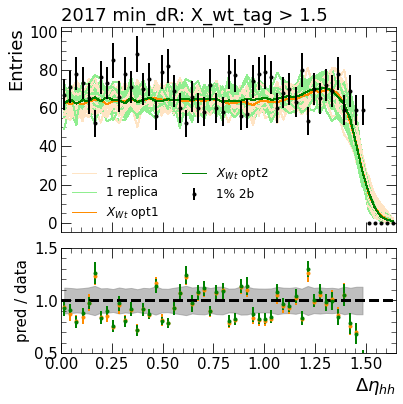

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


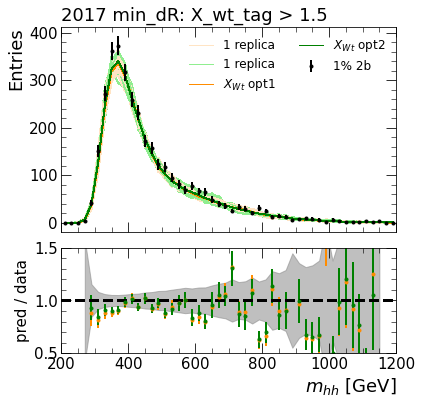

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


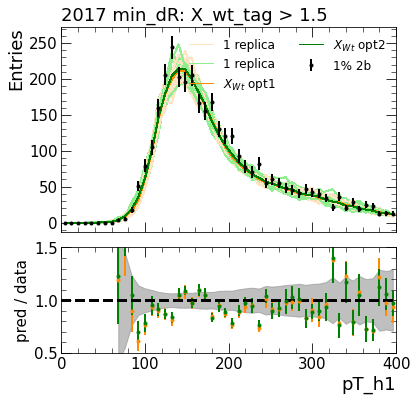

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


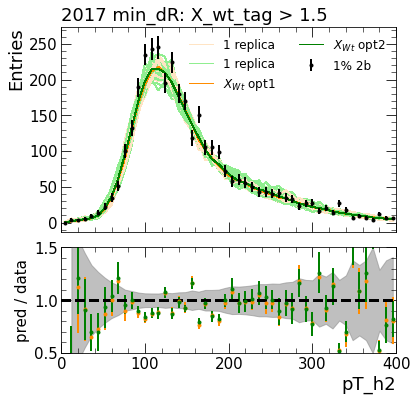

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


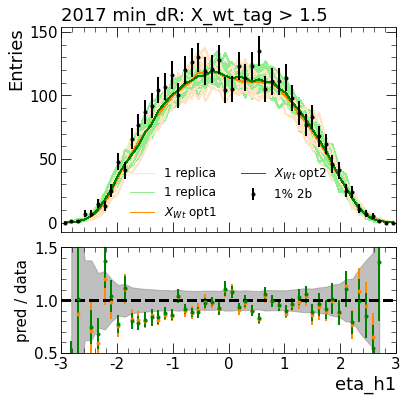

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


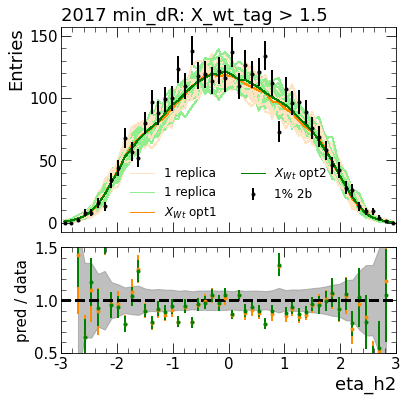

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


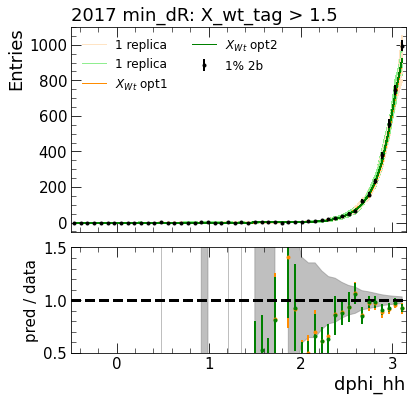

<ipython-input-22-be0546dfb7d5>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


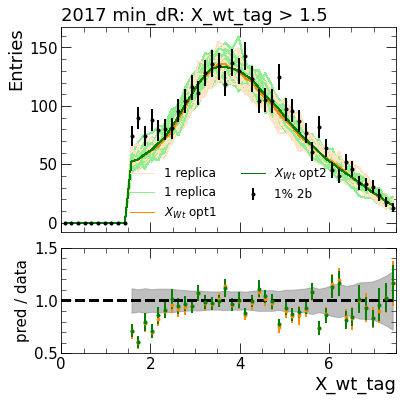

In [22]:
for c, nb, r, xl in zip(['dEta_hh','m_hh','pT_h1','pT_h2','eta_h1','eta_h2','dphi_hh','X_wt_tag'],
                        [55]+[50]*7,
                        [(0,1.65),(200,1200),(0, 400), (0, 400), (-3, 3), (-3, 3), (-0.5, np.pi),(0,7.5)],
                        ['$\Delta \eta_{hh}$', '$m_{hh}$ [GeV]','pT_h1','pT_h2','eta_h1','eta_h2','dphi_hh','X_wt_tag']):

    fig, (ax1,ax2) = plt.subplots(figsize=(6,6),nrows=2,sharex=True,
                              gridspec_kw={"height_ratios": [.66,.34],
                                           "hspace":.1})


    m = (df.X_hh < 1.6) & (df.X_wt_tag > 1.5) & (~df.pass_vbf_sel)
    h_2b,e = np.histogram(df.loc[m,c].values,nb, r)
    xx = .5 * (e[1:] + e[:-1])
    ax1.errorbar(xx,h_2b,np.sqrt(h_2b),color='k',lw=0, 
                 elinewidth=2,marker='.',label='1% 2b',zorder=5)
    
    for i in range(nSeeds):

        hi = hdict1[f'{c}_SR_Xwt_cut_{i}']
        ax1.plot(xx,hi,color='bisque',lw=1,
                 label='1 replica' if i == 0 else None)

        hi = hdict2[f'{c}_SR_Xwt_cut_{i}']
        ax1.plot(xx,hi,color='lightgreen',lw=1,
                 label='1 replica' if i == 0 else None)

    ax1.plot(xx,hdict1[f'{c}_SR_Xwt_cut_mean'],color='darkorange',label='$X_{Wt}$ opt1',lw=1)   
    ax1.plot(xx,hdict2[f'{c}_SR_Xwt_cut_mean'],color='g',label='$X_{Wt}$ opt2',lw=1)   


    ax2.errorbar(xx[h_2b!= 0],
                 hdict1[f'{c}_SR_Xwt_cut_mean'][h_2b!= 0]/h_2b[h_2b!= 0],
                 hdict1[f'{c}_SR_Xwt_cut_std'][h_2b!= 0]/h_2b[h_2b!= 0],
                 color='darkorange',marker='.',lw=0,elinewidth=2)   
    ax2.errorbar(xx[h_2b!= 0],
                 hdict2[f'{c}_SR_Xwt_cut_mean'][h_2b!= 0]/h_2b[h_2b!= 0],
                 hdict2[f'{c}_SR_Xwt_cut_std'][h_2b!= 0]/h_2b[h_2b!= 0],
                 color='g',marker='.',lw=0,elinewidth=2)   
    ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)
    ax2.plot(e[[0,-1]],[1]*2,'k--')

    ax2.set_xlabel(xl,x=1,ha='right',fontsize=18)
    ax2.set_ylabel('pred / data')
    ax1.set_ylabel('Entries',y=1,ha='right',fontsize=18)
    ax1.set_title(f'20{yr} min_dR: X_wt_tag > 1.5',x=0,loc='left')

    ax1.legend(ncol=2,fontsize=12)
    ax1.set_xlim(e[[0,-1]])
    ax2.set_ylim(0.5,1.5)
    
    plt.savefig(f'{figDir}/{c}_{nSeeds}seeds_postXwt.pdf',bbox_inches='tight')
    plt.show()

What about the uormalized X_wt_tag hist?

<ipython-input-25-8a4c71331ac5>:52: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


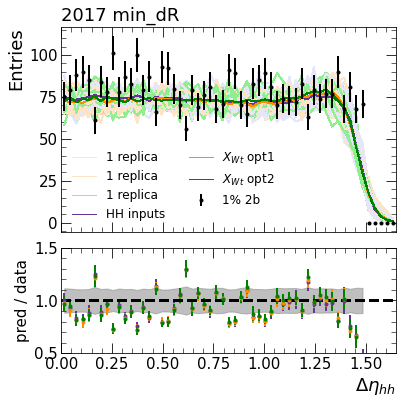

<ipython-input-25-8a4c71331ac5>:52: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


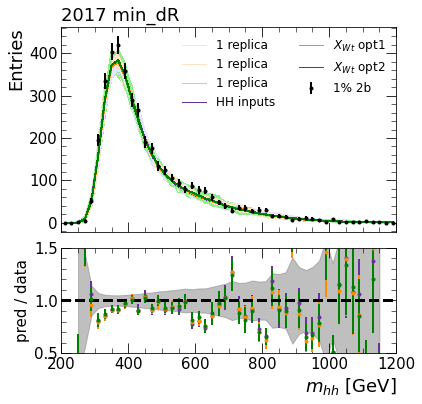

<ipython-input-25-8a4c71331ac5>:52: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


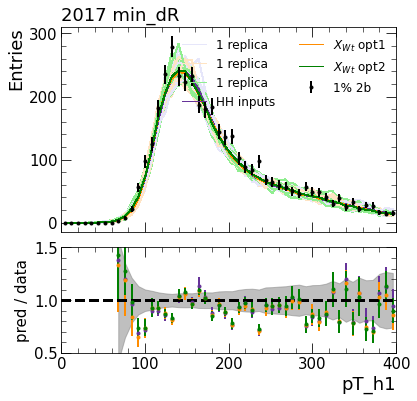

<ipython-input-25-8a4c71331ac5>:52: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


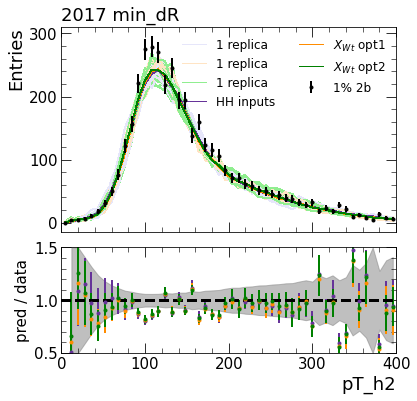

<ipython-input-25-8a4c71331ac5>:52: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


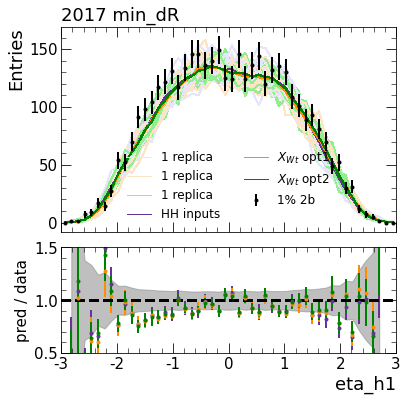

<ipython-input-25-8a4c71331ac5>:52: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


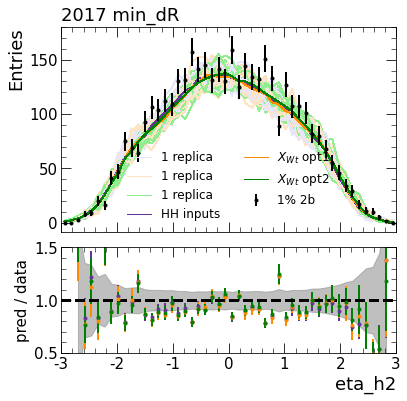

<ipython-input-25-8a4c71331ac5>:52: RuntimeWarning: divide by zero encountered in true_divide
  ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)


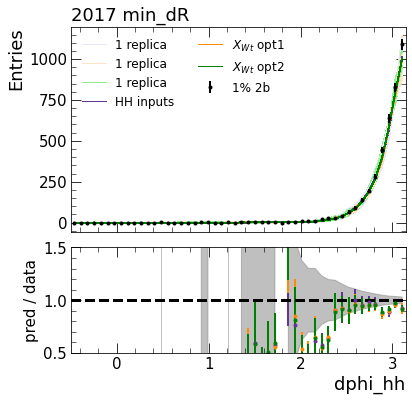

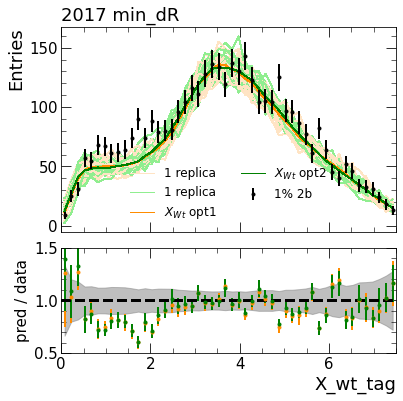

In [25]:
for c, nb, r, xl in zip(['dEta_hh','m_hh','pT_h1','pT_h2','eta_h1','eta_h2','dphi_hh','X_wt_tag'],
                        [55]+[50]*7,
                        [(0,1.65),(200,1200),(0, 400), (0, 400), (-3, 3), (-3, 3), (-0.5, np.pi),(0,7.5)],
                        ['$\Delta \eta_{hh}$', '$m_{hh}$ [GeV]','pT_h1','pT_h2','eta_h1','eta_h2','dphi_hh','X_wt_tag']):

    fig, (ax1,ax2) = plt.subplots(figsize=(6,6),nrows=2,sharex=True,
                              gridspec_kw={"height_ratios": [.66,.34],
                                           "hspace":.1})


    m = (df.X_hh < 1.6) & (~df.pass_vbf_sel)
    h_2b,e = np.histogram(df.loc[m,c].values,nb, r)
    xx = .5 * (e[1:] + e[:-1])
    ax1.errorbar(xx,h_2b,np.sqrt(h_2b),color='k',lw=0, 
                 elinewidth=2,marker='.',label='1% 2b',zorder=5)
    
    for i in range(nSeeds):

        if c != 'X_wt_tag':
            hi = hdict0[f'{c}_SR_{i}']
            ax1.plot(xx,hi,color='lavender',lw=1,
                     label='1 replica' if i == 0 else None)
        
        hi = hdict1[f'{c}_SR_{i}']
        ax1.plot(xx,hi,color='bisque',lw=1,
                 label='1 replica' if i == 0 else None)

        hi = hdict2[f'{c}_SR_{i}']
        ax1.plot(xx,hi,color='lightgreen',lw=1,
                 label='1 replica' if i == 0 else None)

    if c != 'X_wt_tag':
        ax1.plot(xx,hdict0[f'{c}_SR_mean'],color='rebeccapurple',label='HH inputs',lw=1) 
        
        ax2.errorbar(xx[h_2b!= 0],
                     hdict0[f'{c}_SR_mean'][h_2b!= 0]/h_2b[h_2b!= 0],
                     hdict0[f'{c}_SR_std'][h_2b!= 0]/h_2b[h_2b!= 0],
                     color='rebeccapurple',marker='.',lw=0,elinewidth=2)
    
        
    ax1.plot(xx,hdict1[f'{c}_SR_mean'],color='darkorange',label='$X_{Wt}$ opt1',lw=1)   
    ax1.plot(xx,hdict2[f'{c}_SR_mean'],color='g',label='$X_{Wt}$ opt2',lw=1)   

    ax2.errorbar(xx[h_2b!= 0],
                 hdict1[f'{c}_SR_mean'][h_2b!= 0]/h_2b[h_2b!= 0],
                 hdict1[f'{c}_SR_std'][h_2b!= 0]/h_2b[h_2b!= 0],
                 color='darkorange',marker='.',lw=0,elinewidth=2)   
    ax2.errorbar(xx[h_2b!= 0],
                 hdict2[f'{c}_SR_mean'][h_2b!= 0]/h_2b[h_2b!= 0],
                 hdict2[f'{c}_SR_std'][h_2b!= 0]/h_2b[h_2b!= 0],
                 color='g',marker='.',lw=0,elinewidth=2)   
    ax2.fill_between(xx,1+1/np.sqrt(h_2b),1-1/np.sqrt(h_2b),color='grey',alpha=.5,zorder=0)
    ax2.plot(e[[0,-1]],[1]*2,'k--')

    ax2.set_xlabel(xl,x=1,ha='right',fontsize=18)
    ax2.set_ylabel('pred / data')
    ax1.set_ylabel('Entries',y=1,ha='right',fontsize=18)
    ax1.set_title(f'20{yr} min_dR',x=0,loc='left')

    ax1.legend(ncol=2,fontsize=12)
    ax1.set_xlim(e[[0,-1]])
    ax2.set_ylim(0.5,1.5)
    
    plt.savefig(f'{figDir}/{c}_{nSeeds}seeds_preXwt.pdf',bbox_inches='tight')
    plt.show()

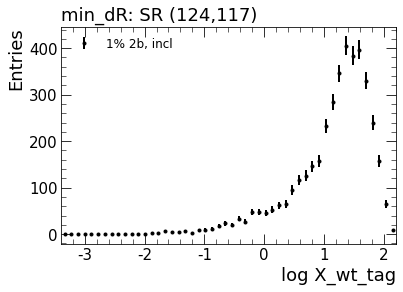

In [24]:
c = 'X_wt_tag'
nb, r = 50, (0,7.5)

h_2b,e= np.histogram(np.log(df.loc[(df.X_hh < 1.6) ,c].values),nb)
xx = .5 * (e[1:]+e[:-1])
plt.errorbar(xx,h_2b,np.sqrt(h_2b),color='k',lw=0, 
             elinewidth=2,marker='.',label='1% 2b, incl',zorder=5)


plt.xlabel('log X_wt_tag',x=1,ha='right',fontsize=18)
plt.ylabel('Entries',y=1,ha='right',fontsize=18)
plt.title(f'min_dR: SR ({x},{y})',x=0,loc='left')

plt.legend(fontsize=12)
plt.xlim(e[[0,-1]])
plt.show()

In [13]:
np.log(1.5)

0.4054651081081644

It isn't clear to me if I would gain anything by taking the log of X_wt_tag when training the flow.